## Aerofit 

### Business Problem: Create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts  and using descriptive analytics to effectively tailor recommendations to customers.
###### For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /Users/girl_intransition/aerofit_treadmill.csv?1639992749
100%|██████████████████████████████████████| 7.28k/7.28k [00:00<00:00, 8.63MB/s]


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd 
import math as m
import random
from scipy.stats import binom

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/Users/girl_intransition/aerofit_treadmill.csv?1639992749")

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
df.shape

(180, 9)

In [7]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


1. There are no missing values.
2. The datatype of each column is appropriate with respect to its data.

In [30]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Outliers: 
1. Age: the mean is at 28 and median is at 26 which is not a large gap. the age coulumn seems to have outliers after 46 years of age. A more detailed view of outliers can be found further in the case study with use of boxplots.
2. We can see that there is not a big gap in mean and median in all the columns with numeric values. we could conclude that we dont have too many outliers from this observation. 
3. Salary values are ranging from 29k to 104k.

In [9]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [10]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

--> checking no of unique values we have in some columns will help us understand the range of values and what kind of data it is and what kind of plots/tables can be created from that data. 

### Checking for Outliers

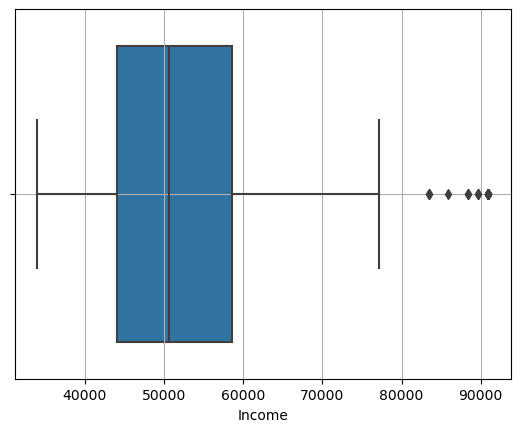

In [37]:
# Checking for Outliers in Income

sns.boxplot(data=df,x='Income')
plt.grid()
plt.show()

In [31]:
# Clipping "Income" feature's outliers 

a_min = np.percentile(df['Income'],5)
a_max = np.percentile(df['Income'],95)

df['Income'] = np.clip(df['Income'],a_min,a_max)

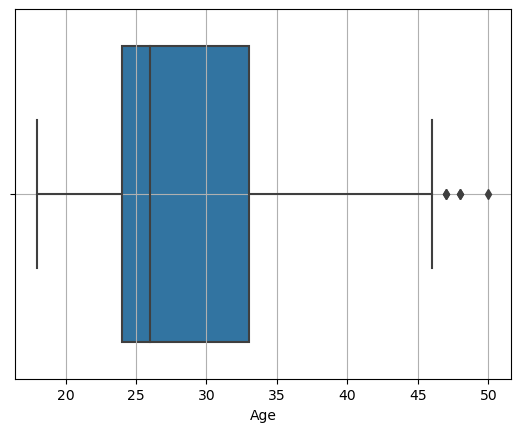

In [32]:
# Checking for Outliers in Age

sns.boxplot(data=df,x='Age')
plt.grid()
plt.show()

In [34]:
# Clipping "Age" feature's outliers 

a_min = np.percentile(df['Age'],5)
a_max = np.percentile(df['Age'],95)

df['Age'] = np.clip(df['Age'],a_min,a_max)

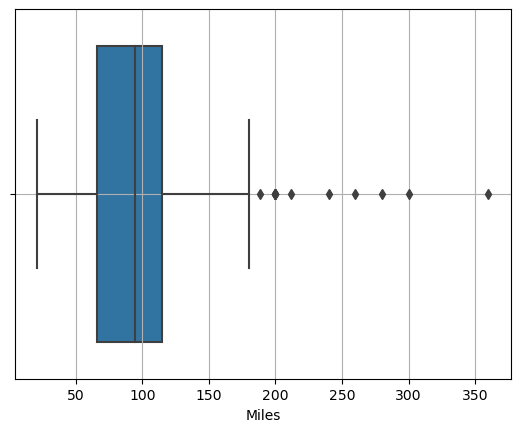

In [38]:
# Checking for Outliers in  Miles

sns.boxplot(data=df,x='Miles')
plt.grid()
plt.show()

In [ ]:
# Clipping "Miles" feature's outliers 

a_min = np.percentile(df['Miles'],5)
a_max = np.percentile(df['Miles'],95)

df['Miles'] = np.clip(df['Miles'],a_min,a_max)

### >> Distribution of  of each product

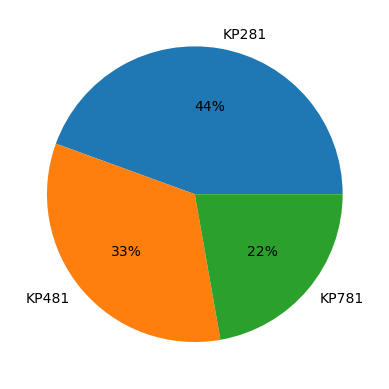

In [39]:
data = df['Product'].value_counts()
labels = df['Product'].value_counts().index
plt.pie(data,labels=labels,autopct='%.0f%%')
plt.show()

### Insight:
1. we can note that the product KP281(entry level treadmill) is the most bought product in Aerofit, followed by KP481 and then KP781.


### >> Product-type vs Gender 

In [40]:
ct2 = pd.crosstab(df['Product'],df['Gender'])
ct2

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [41]:
# probability that a male customer bought any product 

((ct2['Male'].sum()/(ct2['Female'].sum()+ct2['Male'].sum()))*100).round(2)

57.78

In [42]:
# Probability that a male customer buys the model KP781

((ct2.loc['KP781','Male']/ct2.loc['KP781'].sum())*100).round(2)

82.5

In [43]:
# probability that a customer buys the models KP281/KP481 given that she is female

(((ct2.loc['KP281','Female'] + ct2.loc['KP481','Female'] )/ct2['Female'].sum())*100).round(3)

90.789

### Insights:
1. It can be noted that a male customer is slightly more likely to buy a product than a female customer 
2. specifically for the product KP781, it is highly likely that a male customer will buy it. In other words, a female customer is more likely to buy the models KP281/481

## >> Income distribution for each Product type

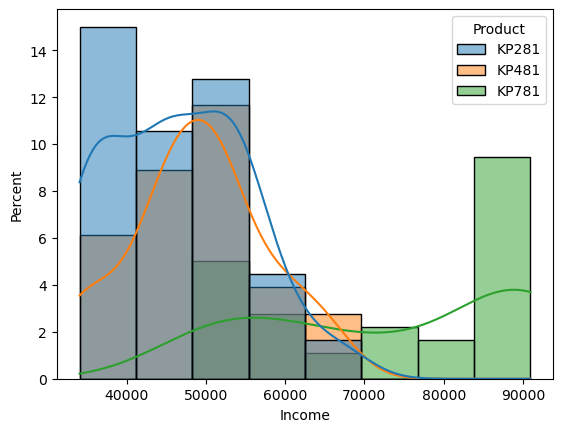

In [44]:
sns.histplot(data=df,x='Income',hue='Product',stat='percent',bins=8,kde=True)
plt.show()

### Insights: 
Note: Although the color coding of the stacked bar chart is confusing, we are using the color coding of KDE plot lines to understand the contribution of income towards each product. 
1. The entry level product is most popular among lower income groups (from 30k - 58k annual salary)
2. The high-end product (KP781) is seen to have steady contibutions from customers with income from 50k to 100k with more contribution in 50k-58k and 88k-94k ranges. 
3. the mid range product(KP481) is popular among customes with incomes from 30k - 68k. 
4. We could infer from the data we see that customer with income above 70k are most likely to buy only KP781 (the high end model).

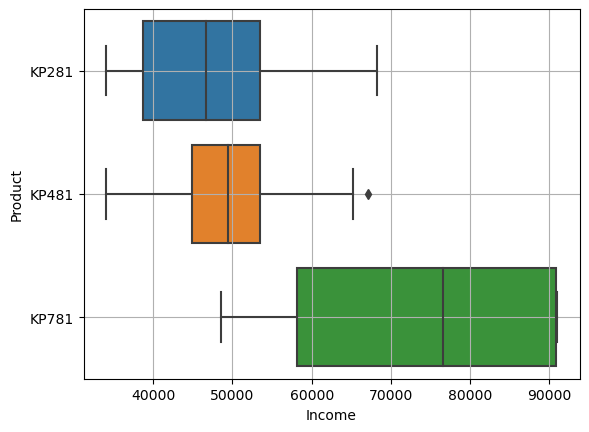

In [45]:
sns.boxplot(data=df,x='Income',y='Product')
plt.grid()
plt.show()


### Insights: 
1. the model KP781 is being preferred by customers whose annual income is in the range of 60k to 90k
2. the models KP281 and KP481 are being preferred by customers whose annual income is in the range of 40k-54k, whereas the model KP281 is being preferred by the lower end of this income group (39k-45k).
3. We do not have a lot of ouliers for income groups which indicates that customer behaviour is consistent with a general hypothesis that lower income group customers will go for lower priced products. 

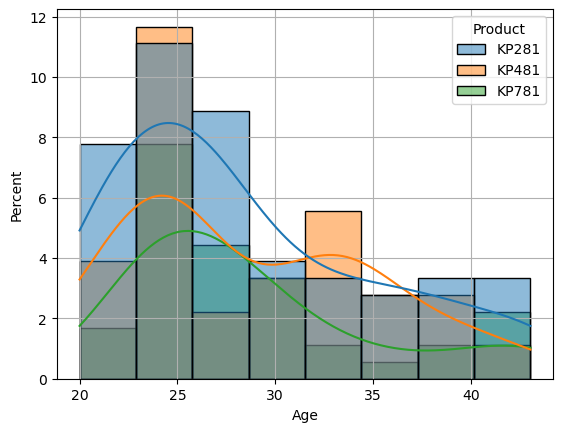

In [46]:
sns.histplot(data=df,x='Age',hue = 'Product',stat='percent',bins=8,kde=True)
plt.grid()
plt.show()

1. We could include kde to understand how much each age is cotributing to a particular product. 
2. Here, we can note that from age 22 to 32, at any given point percent of KP281 models bought are higher than KP481 and percentage of KP481 models bought is greater than KP781.

## >> Effect of age on each product category 

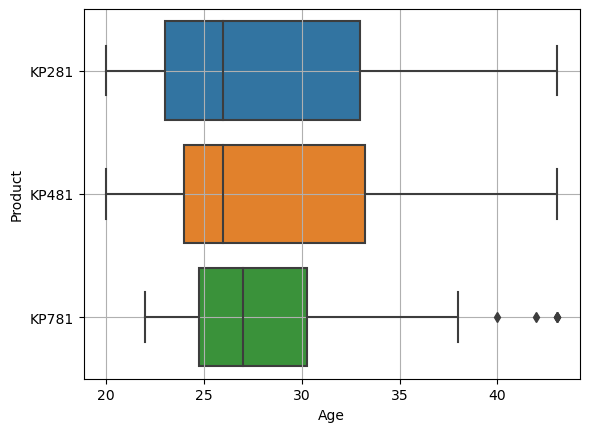

In [47]:
sns.boxplot(data=df,x='Age',y='Product')
plt.grid()
plt.show()


### Insights: 
1. the spread of age for the model KP781 is 25 to 30 years old.
2. there are a lot more ouliers for the product KP781 they lie between ages 40 to 50.
3. the median age for buying the models KP281/481 is similar and is 26.
4. the spread of data for KP281/481(24-34)is more compared to the spread for model KP781(25-30).



## >> Marital status distribution


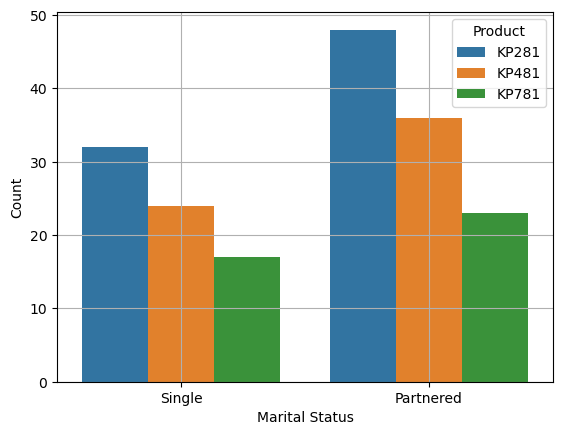

In [48]:
sns.countplot(data=df,x='MaritalStatus',hue='Product')
plt.xlabel("Marital Status")
plt.ylabel('Count')
plt.grid()
plt.show()

In [49]:
ct1 = pd.crosstab(df['Product'],df['MaritalStatus'])
ct1

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [50]:
# Percentage of couples buying KP781

((ct1['Partnered'].loc['KP781']/ct1.loc['KP781'].sum())*100).round(2)


57.5

In [51]:
# Percentage couples buying KP281 or KP481

(((ct1['Partnered'].loc['KP281']+ct1['Partnered'].loc['KP481'])/(ct1.loc['KP281'].sum()+ct1.loc['KP481'].sum()))*100).round(2)


60.0

### Insights: 
1. We can note from the graph that there are more no of 'partners' who are buying treadmills in general compared to single customers.
2. The difference in single and partnered customer buying KP281 and KP481 is more significant than KP781.
3. We can deduce from the above table that Couples are more likely to buy the models KP281/481 

### >> Fitness,Usage and Miles 

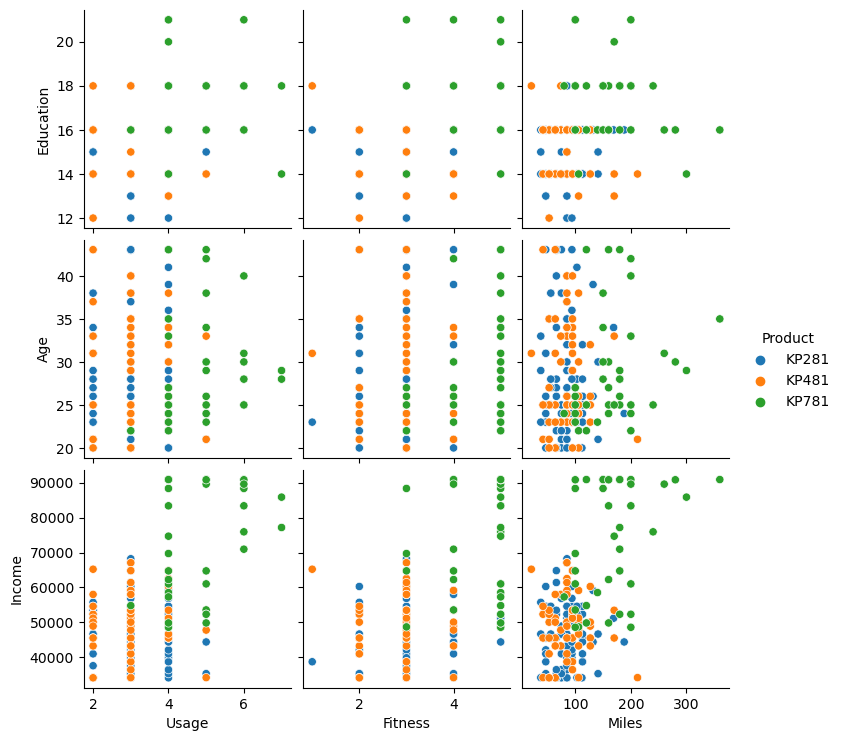

In [52]:
sns.pairplot(df,x_vars= ['Usage','Fitness','Miles'],y_vars = ['Education','Age','Income'], hue='Product')

### >> Fitness distribution for each product


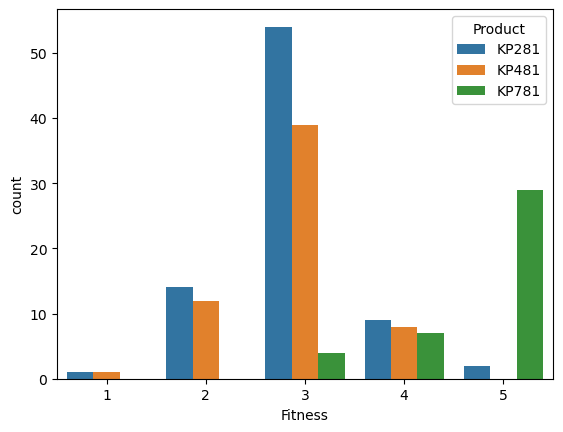

In [53]:
sns.countplot(data=df,x='Fitness',hue='Product')
plt.show()

### Insights: 
1. customers who are atleast moderately fit (>=3) are likely to buy the KP781 model
2. customers who are fit(rating =5) are more likely to buy the model KP781
3. customers who self-rated their fitness to be 4 seem to be equally divided between all three product types. 

In [54]:
# Self rated fitness level vs Product bought 

ct4 = pd.crosstab(df['Fitness'],df['Product'])
ct4

Product,KP281,KP481,KP781
Fitness,,,
1,1,1,0
2,14,12,0
3,54,39,4
4,9,8,7
5,2,0,29


#### Probability that self-rated fitness LESS THAN OR EQUAL TO 3 given that the customer bought KP281

In [55]:
(ct4.loc[1,'KP281']+ct4.loc[2,'KP281']+ct4.loc[3,'KP281'])/ct4['KP281'].sum()

0.8625

#### Probability that self-rated fitness LESS THAN OR EQUAL TO 3 given that the customer bought KP481

In [56]:
(ct4.loc[1,'KP481']+ct4.loc[2,'KP481']+ct4.loc[3,'KP481'])/ct4['KP481'].sum()

0.8666666666666667

#### Probability that self-rated fitness LESS THAN OR EQUAL TO 3 given that the customer bought KP781

In [57]:
(ct4.loc[1,'KP781']+ct4.loc[2,'KP781']+ct4.loc[3,'KP781'])/ct4['KP781'].sum()

0.1

#### Probability that self-rated fitness EQUAL TO 5, given that the customer bought KP781

In [58]:
(ct4.loc[5,'KP781'])/ct4['KP781'].sum()

0.725

### Insights: 
1. 86.26 percent of customers who think they are low to moderately fit(fitness <= 3) purchase low end model like KP281. The percentage for KP481 is the similar(86.6%) with customers whose fitness is rated to be <=3 . 
2. 72.5 percent of customers who rate themselves to be in excellent shape buy KP781.

### >> expected Usage vs Product

In [59]:
ct5 = pd.crosstab(df['Usage'],df['Product'])
ct5

Product,KP281,KP481,KP781
Usage,,,
2,19,14,0
3,37,31,1
4,22,12,18
5,2,3,12
6,0,0,7
7,0,0,2


#### Probability that Usage LESS THAN 4 given that the customer bought KP781

In [60]:
(ct5.loc[2,'KP781']+ct5.loc[3,'KP781'])/ct5['KP781'].sum()

0.025

#### Probability that Usage IS LESS THAN OR EQUAL TO 4 given that the customer bought KP481

In [61]:
(ct5.loc[2,'KP481']+ct5.loc[3,'KP481']+ct5.loc[4,'KP481'])/ct5['KP481'].sum()

0.95

#### Probability that Usage IS LESS THAN OR EQUAL TO 4 given that the customer bought KP281

In [62]:
(ct5.loc[2,'KP281']+ct5.loc[3,'KP281']+ct5.loc[4,'KP281'])/ct5['KP281'].sum()

0.975

### Insights: 
1. Customers with expected usage < 4, the probability that they buy for KP281/481 is around 95% with is very high. 
2. Customers with usage > 5, bought exclusively KP781 model. 
3. While the Expected usage of 4 times per week had a mix of customers buying all three models,customers with expected usage of 5 were more inclined to buy model KP781. 

### Expected miles per week vs Product

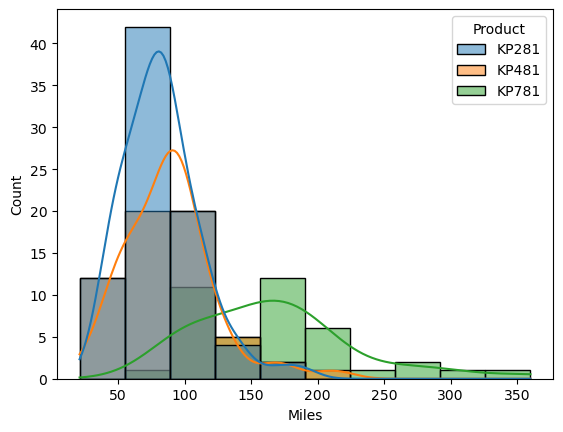

In [63]:
sns.histplot(data=df,x='Miles',hue = 'Product',bins=10,kde=True)
plt.show()

In [64]:
df_miles= df.loc[df['Miles'] <= 125]
df_miles

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.00,Male,14,Single,3,4,34053.15,112
1,KP281,20.00,Male,15,Single,2,3,34053.15,75
2,KP281,20.00,Female,14,Partnered,4,3,34053.15,66
3,KP281,20.00,Male,12,Single,3,3,34053.15,85
4,KP281,20.00,Male,13,Partnered,4,2,35247.00,47
...,...,...,...,...,...,...,...,...,...
153,KP781,25.00,Male,18,Partnered,4,3,64741.00,100
157,KP781,26.00,Female,21,Single,4,3,69721.00,100
160,KP781,27.00,Male,18,Single,4,3,88396.00,100
161,KP781,27.00,Male,21,Partnered,4,4,90886.00,100


#### Probability  a customer  bought KP281 or KP481 given that he/she expected to run less than 125 miles per week


In [65]:
df_miles[df_miles['Product'].isin(['KP281','KP481'])].shape[0]/df_miles.shape[0]

0.9130434782608695

#### Probability a customer bought KP781 given that he/she expected to run less than 125 miles per week

In [66]:
df_miles[df_miles['Product'] == 'KP781'].shape[0]/df_miles.shape[0]

0.08695652173913043

### Insights: 
1. We can infer from the histogram and the probablity calculations that customers who run more than 125 miles per week have a probability of 0.913 to buy KP281 or 481


####  Probability that a customer will buy KP781 given that they run more than 125 miles per week 

In [67]:
df_miles1 = df.loc[df['Miles'] > 125]
df_miles1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
8,KP281,21.0,Male,15,Single,5,4,35247.0,141
23,KP281,24.0,Female,16,Partnered,5,5,44343.0,188
39,KP281,26.0,Male,16,Partnered,4,4,44343.0,132
53,KP281,30.0,Male,14,Partnered,4,4,46617.0,141
61,KP281,34.0,Male,16,Single,4,5,51165.0,169


In [68]:
df_miles1[df_miles1['Product'] == 'KP781'].shape[0]/df_miles1.shape[0]

0.6666666666666666

### Insights:
1. A customer who expects to run more than 125 miles per week is more likely to buy KP781 than other models.


## >> Correlation/Heatmap

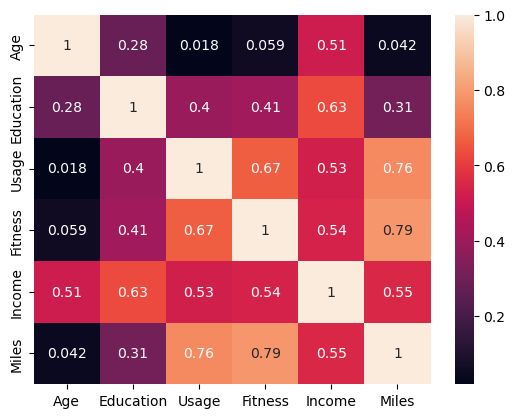

In [69]:
sns.heatmap(df.corr(),annot=True)
plt.show()

1. Income and Education, Fitness and Usage, Usage and Miles are positively correlated. 

## >> Customer profiling 

#### KP281 :

1. A female or a male customer a almost eaqually likely to buy this model
2. This model is popular with customers of ages from 23-33 
3. Popular among customers with fitness rating 2,3 and 4 with male customers 
4. Bought by customers whose median education is less than or equal to 16 and annual income <= 60k .
5. A customer's typical usage is less than or equal to 5 times a week and runs less than 125 miles per week. 

#### KP481:

1. Preferred by customer who workout 2-5 times a week 
2. Their self evaluated fitness rating is less than or equal to 4. 
3. They run less than 125 miles per week.
4. Their median education is less than 16 and annual income is below 75k.

#### KP781:

1. They expect to use the treadmill atleast 4 times a week.
2. They have a self evaluated fitness level of 4 or 5.
3. They expect to run atleast 125 miles per week. 
4. The customers who buy KP781 treadmills are most likely males, aged 24 to 30.
5. Their median education is greater than 16 years
6. Even though a customer's salary is arond the median, if he/she is fit and expects to use the machine more often, they are more likely to buy this model.


## >> Business recommendations: 

1. Men are almost equally likely to buy any of the three products but women are more likely to buy KP281 and KP481. Hence KP781 is more likely to be bought by a man than a woman. 

2. The median education in years is 16. Customers who belong mostly to the segment of customer with education below 16 years, they are more likely to buy KP281 and KP481. 

3. The salary/annual income range for most customers who purchase KP281 or KP481 lies between 30k to 54k, whereas the customers who purchase KP781 have salary range of 58k to 92k. 

4. Assuming that the profit margins for high end models are higher, we could upsell KP481/781 to customer whose fitness = 4 and usage = 4, which means that they have already been working out for a while. They could be pursuaded to buy a higher end model that can provides more features.

5. Since it is no definitive guide on to tell how much a customer earns or how educated a customer is just by looking at them (taking into account risk of not being able to profile the customer correctly), it is best to rely on the these three factors; Fitness, usage and miles. If a customer rates him/herself 4 or 5 out of 5 or expects to use frequently, we could show him a model with advanced features.

6. There are more partnered customers than single customers and the overall sales of KP281 is more than KP481, which is more than KP781 for wither of the category.
